#Taller de repaso
## Métodos Numéricos, DC, FCEN, UBA
### 2do cuatrimestre 2022

------

El objetivo del taller es repasar los temas que entran en el segundo parcial, con el interés particular del labo en métodos iterativos (tema central al tp3).

- Se deberán resolver los siguientes ejercicios y responder las preguntas justificando adecuadamente.
- El taller está pensado para resolverse en grupos de 2 o 3 personas.
- Sugerimos ir consultando cada punto con los docentes a modo de checkpoint.


In [ ]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

## Ejercicio 1


Dado el siguiente sistema lineal sobredeterminado:

$$
A x = b \\
\begin{pmatrix}
1  & 0  & 0 \\
0  & 1  & 0 \\
0  & 0  & 1 \\
-1 & 1  & 0 \\
0  & -1 & 0 \\
-1 & 0  & 1
\end{pmatrix}
%
\begin{pmatrix}
x_a \\
x_b \\
x_c
\end{pmatrix}
=
\begin{pmatrix}
1 \\
2 \\
3 \\
1 \\
2 \\
1
\end{pmatrix}
$$

- Hallar $x^*$ mediante cuadrados mínimos, utilizando ecuaciones normales. ¿Bajo que condiciones esta solución es única?


- Probar que el residuo, $r = b-Ax$ resulta ortogonal a $Im(A)$ si $x = x^*$ es la solución de cuadrados mínimos. Luego verificar para la matriz A en código.



__Sugerencia:__ Utilizar la función [solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html) de Numpy para encontrar la solución de un sistema determinado.


In [ ]:
A = np.array([[1,0,0], [0,1,0], [0,0,1], [-1, 1, 0], [0, -1, 0], [-1, 0, 1]])
b = np.array([1,2,3,1,2,1])

AT = A.transpose()
ATA = np.matmul(AT, A)
ATb = np.matmul(AT, (b.transpose()))

x = np.linalg.solve(ATA, ATb)

print(F"La solución el sistema es:")
for i in range(0, len(x)):
  print(F"x{i}: {x[i]}")

# Calculamos el residuo r = b - Ax
# Si x = x*, con x* nuestro resultado de CM, entonces:
Ax = np.matmul(A, x)
r = b - Ax

print("")
print("El residuo:")
print(r)
# Deberia cumplirse que AT*r = 0
ATr = np.matmul(AT, r)

# Vemos que sea cercano a 0
print("")
print("Vemos que se cumpla que AT*r = 0")
print(ATr)

# Hay que ver la demo

La solución el sistema es:
x0: 0.6153846153846153
x1: 0.5384615384615385
x2: 2.3076923076923075

El residuo:
[ 0.38461538  1.46153846  0.69230769  1.07692308  2.53846154 -0.69230769]

Vemos que se cumpla que AT*r = 0
[1.11022302e-16 0.00000000e+00 4.44089210e-16]


## Ejercicio 2


Dado el siguiente método iterativo para la resolución de sistemas lineales $Ax=b$:

<center> $x^{k} = (I-A) x^{k-1} + b$ </center>


- Demostrar que si el método converge, entonces lo hace a una solución del sistema $Ax=b$.

- Demostrar que si la matriz $A$ es estrictamente diagonal dominante por filas, y los elementos de la diagonal son iguales a $1$, entonces el método converge

- Dada una matriz $A$ inversible estrictamente diagonal dominante por filas, y usando la propiedad demostrada en el ejercicio anterior, proponer una modificación al método para que este converja.

## Ejercicio 3

- Completar los métodos de Jacobi y Gauss-Seidel. Tener en cuenta que las funciones también deben devolver el vector de errores que resulta de comparar la solución aproximada de una iteración contra la solución conocida $x\_direct$ obtenida mediante la  función [solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html) de Numpy.

- Probar los métodos con la matriz A (definida en el código), graficar y  analizar el error de la solución. ¿Converge a una solución?¿Cómo podría justificarse lo anterior analizando la matriz A?

- En caso de converger, ¿cuál método lo hace más rápido? ¿Por qué?



In [ ]:
def jacobi(A,b,reps,x_ini,x_direct):
    # Matrices para los metodos iterativos
    eps = 1e-6
    D = np.diag(np.diag(A))
    L = -np.tril(A) + np.diag(np.diag(A))
    U = -np.triu(A) + np.diag(np.diag(A))

    T = np.linalg.inv(D) @ (L+U)
    c = np.linalg.inv(D) @ b

    xi = x_ini
    error = []

    anterior = x_ini
    for i in range(reps):
        xi = T @ xi + c
        #xi = np.dot(T,xi) + c
        actual = xi
        diferencia = np.linalg.norm(anterior - actual)
        if(diferencia < eps):
          break;
        anterior = actual
        error.append(np.linalg.norm(xi - x_direct))
    return xi, error

In [ ]:
def gauss_seidel(A,b,reps,x_ini,x_direct):
    # Matrices para los metodos iterativos
    eps = 1e-6
    D = np.diag(np.diag(A))
    L = -np.tril(A) + np.diag(np.diag(A))
    U = -np.triu(A) + np.diag(np.diag(A))

    T = np.linalg.inv(D-L) @ U
    c = np.linalg.inv(D-L) @ b

    xi = x_ini
    error = []
    anterior = x_ini
    for i in range(reps):
        xi = T @ xi + c
        #xi = np.dot(T,xi) + c
        actual = xi
        diferencia = np.linalg.norm(anterior - actual)
        if(diferencia < eps):
          break;
        anterior = actual
        error.append(np.linalg.norm(xi - x_direct))
    return xi, error

In [ ]:
A = np.array([[8,np.sqrt(2),1/3],
              [np.sqrt(3),10, 5.5],
              [0,1 , 7/6]])
b = np.array([5,3.5,2])

x = np.linalg.solve(A,b)

x_ini = np.ones(3)

In [1]:
x_jacobi, error_jacob = jacobi(A,b,1000,x_ini,x)

print("Jacobi Estimacion:", x_jacobi)
print("X (directo)", x)

plt.plot(error_jacob)
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()

NameError: ignored

Gauss Seidel Estimacion: [ 0.74628636 -1.36616828  2.8852871 ]
X (directo) [ 0.74628648 -1.36616872  2.88528748]


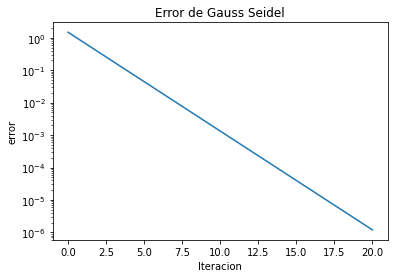

In [ ]:
x_gauss, error_gauss = gauss_seidel(A,b,1000,x_ini,x)

print("Gauss Seidel Estimacion:", x_gauss)
print("X (directo)", x)

plt.plot(error_gauss)
plt.title("Error de Gauss Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()

## Ejercicio 4


Dado el siguiente sistema lineal sobredeterminado:

$$
A x = b \\
\begin{pmatrix}
1  & 0  & 3 \\
0  & 1  & 1 \\
1  & -1  & 2 \\
-1 & 1  & -2 \\
0  & -1 & -1 \\
-1 & 0  & -3
\end{pmatrix}
%
\begin{pmatrix}
x_a \\
x_b \\
x_c
\end{pmatrix}
=
\begin{pmatrix}
1 \\
2 \\
3 \\
1 \\
2 \\
1
\end{pmatrix}
$$

- Hallar $x^*$ mediante cuadrados mínimos, utilizando ecuaciones normales. En caso de ser posible, emplear un método iterativo y un método directo para resolverlas.


In [ ]:
C = np.array([[1, 0, 3],
              [0, 1, 1],
              [1, -1, 2],
              [-1,1,-2],
              [0,-1,-1],
              [-1,0,-3]])

b = np.array([1, 2, 3, 1, 2, 1])

CT = C.transpose()
CTC = np.matmul(CT, C)
CTb = np.matmul(CT, (b.transpose()))

x_cml_final = np.zeros(3)
x_cml_init = np.random.rand(3)

x_cml_j = jacobi(CTC,CTb,1000,x_cml_init,x_cml_final)
x_cml_g = gauss_seidel(CTC,CTb,1000,x_cml_init,x_cml_final)

# Tengo aca todo
# x es la solución real
# x_cml_j es la solucion jacobi
# x_cml_g es la solucion gauss seidel

# Verificar que efectivamente x_cml sea solucion

# Resta eso

## Ejercicio 5

Considerar los siguientes datos que fueron generados a partir de un polinomio de grado 2:

$$p(x) = 4 x + 0.5 x^2 + C$$

donde $C$ ruido agregado con distribución normal

Los mismos serán los datos a ajustar utilizando cuadrados mínimos lineales.

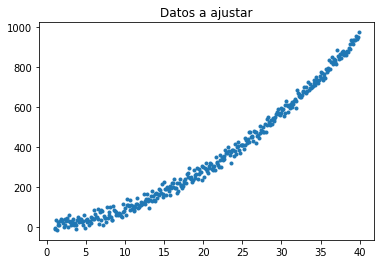

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def p(x):
    'implementa la funcion p(x) definida en el enunciado'
    'observación: x puede ser escalar o vector, en tal caso
                  'se aplica p a cada x (broadcasting) '
    y = 4 * x + 0.5 * x ** 2 + np.random.randn(*x.shape) * 20
    return y

# Creo valores entre 1 y 40 espaciados 0.1
x = np.arange(1, 40, 0.1)
y = p(x)

plt.plot(x, y, '.')
plt.title('Datos a ajustar')
plt.show()

### Propuesta:
La idea será ajustar un polinomio $f(x)$ de grado 4 a los datos anteriores.
Es decir, considerando la familia de funciones $F = \{x,x^{2},x^{3},x^{4}\}$ queremos encontrar una función $f(x) = a_{0}x+a_{1}x^{2}+a_{2}x^{3}+a_{3}x^{4}$, una combinación lineal de ellas, que "mejor aproxime", en términos de cuadrados mínimos, a $p(x)$.

### Implementación:
Para esto, podríamos utilizar cuadrados mínimos a través de ecuaciones normales resueltas por un método directo (_np.linalg.solve_).
Recordar que la matriz A de CML tiene la siguiente forma:
$$A=
\begin{pmatrix}
\delta_{1}(x_{1}) & \delta_{2}(x_{1}) & \ldots  & \delta_{n}(x_{1}) \\
\vdots & \vdots & \ldots & \vdots \\
\delta_{1}(x_{m}) & \delta_{2}(x_{m}) & \ldots  & \delta_{n}(x_{m}) \\
\end{pmatrix} $$


En este caso particular, utilizando la función [np.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html) y el vector x creado previamente, buscamos:

$$A=
\begin{pmatrix}
x_{1} & x_{1}^{2} & x_{1}^{3} & x_{1}^{4} \\
\vdots & \vdots & \ldots & \vdots \\
x_{390} & x_{390}^{2} & x_{390}^{3} & x_{390}^{4} \\
\end{pmatrix} $$

### Responder:

- Encontrar, mediante ecuaciones normales via método directo, $x*$ el vector solución de cuadrados mínimos
- Estimar la solución de cuadrados mínimos utilizando los métodos iterativos del punto 3 y graficar los errores de los métodos (con respecto a la solución hallada con el método directo) en función de las iteraciones.
- Indicar si los métodos convergen. Justificar adecuadamente.



In [ ]:
A = np.stack([x, x ** 2, x ** 3, x ** 4]).T
b = y


x_direct = ...
print("Solucion directa:", x_direct)

In [ ]:
# Jacobi
x_ini = ...
reps = ...
x_jacobi, error = ...

print("Jacobi Estimacion:", x_jacobi)
print("X (directo)", x_direct)

plt.plot(error)
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()


# Gauss-Seidel
reps = ...
x_ini = ...
x_gs, error = ...

print("Gauss-Seidel Estimacion:", x_gs)
print("X (directo)", x_direct)

plt.plot(error)
plt.title("Error de Gauss-Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()

### Ajustando la función

Recapitulando, queríamos encontrar con CML los coeficientes para $f(x) = a_{0}x+a_{1}x^{2}+a_{2}x^{3}+a_{3}x^{4}$.

Para encontrar la solución, utilizamos ecuaciones normales que resolvimos primero utilizando un método directo y luego uno iterativo. Idealmente, ambas soluciones deberían "parecerse".

Finalmente, nos interesa ver como se ajusta nuestra función a los datos originales.

### Responder:
- A partir de lo anterior, fittear la función estimada, f(x) a los datos originales. Mostrar en un gráfico.
- ¿Qué puede decirse sobre los valores estimados de los coeficientes de mayor grado?

In [ ]:
def f(x,coef):
    'implementar la funcion f(x) que ajustará a los datos'
    'obs: coef es el vector con los coeficientes a_0 ... a_3'
    'x puede ser escalar o vector, en tal caso se aplica p a cada x (broadcasting)'

    return

In [ ]:
coef = ...
y_pred = f(x,coef)

plt.plot(x,y, '.') # puntos originales

plt.plot(..., 'r') # puntos estimados

plt.title("Polinomio ajustado")
plt.xlabel("x")
plt.ylabel("y");

### Predicciones
Vimos que otra de las aplicaciones de este método es poder predecir la variable dependiente para instancias desconocidas. Para ver esto, podemos tomar otro rango de valores de x y observar como se "extrapola"

In [ ]:
x_new  = np.concatenate([np.arange(-5, 1, 0.1),[np.nan],np.arange(40, 46, 0.1)])
y_pred = f(x_new, coef)

# Puntos originales
plt.plot(x,y, '.')

# Puntos estimados
plt.plot(x_new,y_pred, 'r')


plt.title("Polinomio ajustado")
plt.xlabel("x")
plt.ylabel("y");


## Ejercicio 6
Dada la siguiente matriz
$$
A =
\begin{pmatrix}
	1 & \sqrt{3} & 0 \\
	\sqrt{3} & 4 & \sqrt{3}/2 \\
	0 & \sqrt{3}/2 & 7/4
\end{pmatrix}
$$

Hallar $A = U \Sigma V^t$ la descomposición en valores singulares de $A$ utilizando únicamente la función [eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) de Numpy para calcular los autovalores y autovectores necesarios.

__Sugerencia__: Considerar alguna propiedad de la matriz que pueda resultar de utilidad para simplificar los cálculos.


In [ ]:
A = np.array([[1,          np.sqrt(3),   0           ],
              [np.sqrt(3), 4,            np.sqrt(3)/2],
              [0,          np.sqrt(3)/2, 7/4         ]])



In [ ]:
# COMPLETAR

In [ ]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [-1,1, 0],
              [0,-1, 0],
              [-1,0, 1]])

b = np.array([1, 2, 3, 1, 2, 1])

x = None # COMPLETAR

# Prueba con numpy para verificar
x_np = np.linalg.lstsq(A, b)[0]

np.allclose(x, x_np)


# Laboratorio de Métodos Numéricos 
## Matrices SDP y factorización de Cholesky

En este taller, vamos a implementar la factorización de Cholesky.

Primero, algún código preliminar para correr algunos tests

In [ ]:
import math 
import traceback
eps = 1e-5
 
def isSymmetrical(A):
    return np.allclose(A,A.T,eps)

def validateMe(L,A):
    return np.allclose(L@L.T,A)

def mntest(func):
    global tests
    
    tests.append(func)    
    
    return func

def correr_tests():
    excepciones = []
    for test in tests:
        try:
            print("Corriendo {} ... ".format(test.__name__), end='')
            test()
            print("OK")
        except AssertionError as e:
            error_msg = traceback.format_exc()
            excepciones.append((test, error_msg))
            print("ERROR")
    
    if len(excepciones) > 0:
        print("\nErrores:\n")
        for (test, error_msg) in excepciones:
            print("En {}".format(test.__name__))
            print(error_msg)
    else:
        print("Todos los tests pasaron correctamente")

### Ejercicio 1: 
Completar la función que calcula la factorización de cholesky.
Recibe una matriz A y debe devolver una nueva matriz con la L de cholesky.
Debe chequear que la matriz sea cuadrada, simétrica, y luego durante el algoritmo agregar los chequeos necesarios donde haga falta.
En cualquier caso que falle, debe lanzar una excepción con el mensaje "Matriz no SDP."

In [ ]:
def cholesky(A):
    
    if(not isSymmetrical(A)):
        raise ValueError("Matriz no SDP")
        
    n = A.shape[0];
    L = np.zeros((A.shape[0],A.shape[1]), float)
    
    for j in range(0, n):
      f_sum = 0

      if(A[j][j] <= 0):
        raise ValueError("Matriz no SDP")

      for k in range(0, j):
        f_sum = f_sum + L[j][k]**2

      if(A[j][j] <= f_sum):
        raise ValueError("Matriz no SDP")

      eq_1 = np.sqrt(A[j][j] - f_sum)

      L[j][j] = eq_1

      for i in range(j, n):
        s_sum = 0
        for k in range(0, j):
          s_sum = s_sum + L[i][k]*L[j][k]
        L[i][j] = (1/L[j][j])*(A[i][j] - s_sum)
    return L

In [ ]:
tests = []

@mntest
def matriz_no_simetrica():
    A = np.array([
          [0.066076,.181880],
          [1.181880,.624953]
    ])

    try:
        L = cholesky(A)
        raise AssertionError("Tiene que lanzar excepción")
    except ValueError as e:
        pass


@mntest
def matriz_no_sdp():
    A = np.array([
          [-0.066076,   0.181880],
          [ 0.181880,   0.624953]
    ])
    try:
        L = cholesky(A)
        raise AssertionError("Tiene que lanzar excepción")
    except ValueError as e:
        pass

    
@mntest
def matriz_diagonal_positiva():
    A = np.array([
          [4.0,.0],
          [.0,9.0]
    ])
    L_1 = np.array([
          [2.0,0.0],
          [.0,3.0]
    ])
    
    L2 = cholesky(A)
    
    assert(np.allclose(L2,L_1))
    
    
@mntest
def matriz_sdp1():
    A  = np.array([[4.,-1.,1.], [-1, 4.25, 2.75],[1,2.75,3.5]],dtype='f')
    L = cholesky(A)
    
    assert(np.allclose(A,L@L.T))
    
    
@mntest
def matriz_sdp2():
       
    L_1 =  np.array([
        [5.99246,   .0,  .0,   .0,   .0],
        [0.45174,   5.02065,   .0,   .0,   .0],
        [0.50921,   0.40611,   5.25767,   .0,   .0],
        [0.45632,   0.52172,   0.78430,   5.98219,   .0],
        [0.41578,   0.11483,   0.24938,   0.45188,   5.28701]
    ])

    A    = L_1@L_1.T
    L2   = cholesky(A)
    assert(np.allclose(L2,L_1))

    
correr_tests()


### Ejercicio 2: 
Completar la función que calcula la factorización de cholesky por bloques.
Recibe una matriz A y debe devolver una nueva matriz con la L de cholesky.
Tener en cuenta las mismas consideraciones que el ejercicio anterior.


### ¿Cómo es esto de resolver en bloques?
Sea $A \in \mathbb{R}^{n \times n}$ a la cual le queremos calcular la factorización Cholesky. Para ello, lo calcularemos en bloques en vez del método antes visto

Supongamos que A tiene factorización Cholesky; es decir podemos descomponerla en $L y L^T \in \mathbb{R}^{n \times n}$ escribiendo la descomposición en bloques de la forma:


$$
A = L L^T \\
$$

$$
\begin{pmatrix}
a_{11}   & A_{12}  \\
A_{12}^T & A_{22}
\end{pmatrix} = \begin{pmatrix}
l_{11} & 0  \\
L_{21} & L_{22}
\end{pmatrix} \begin{pmatrix}
l_{11} & L_{21}^T  \\
0      & L_{22}
\end{pmatrix}
$$

&nbsp;


donde $a_{11}, l_{11}$ son escalares, $A_{12} \in \mathbb{R}^{1 \times (n-1)}$ (vector fila), $L_{21} \in \mathbb{R}^{(n-1) \times 1}$ (vector columna)

De aquí obtenemos las siguientes ecuaciones:

$$
a_{11} = l_{11}^2  \\
A_{12} = L_{21}^T l_{11} \\
A_{22} = L_{21} L_{21}^T + L_{22}L_{22} \\
$$

Estas 3 ecuaciones nos permitirán despejar y obtener el contenido del primer escalar y de la columna de L. Ahora, nos queda la última ecuación:

$$
A_{22} = L_{21}  L_{21}^T + L_{22} L_{22}^T \\
$$

Reescribiéndola, nos queda:

$$
A_{22} - L_{21}  L_{21}^T = L_{22} L_{22}^T \\
$$

Y aquí, un pequeño salto de fe (esperemos razonable para los que ya hayan cursado Algo 2): si resolvemos la factorización de Cholesky de $A_{22} - L_{21} L_{12}^T$, podemos obtener los dos bloques que nos faltan.





**Ejercicio**:  Calcular Cholesky en bloques para que tome una matriz $A \in \mathbb{R}^{n \times n}$ y nos devuelva $L$

La resolución tiene que ser *iterativa* pero puede convenir empezar a pensarlo en términos recursivos.

¿Cómo aseguran paso a paso que la matriz tenga factorización Cholesky?

**Hint**: Ojo con la dimensión de los vectores. Si queremos multiplicar una matriz "columna", con una matriz "fila" tenemos que hacer reshape primero o usar `np.outer`


In [ ]:
def chol_en_bloques(A):
    """
    Dada una matriz A, devuelve L 
    
    Argumentos:
    -----------
    
    A: np.array
        Matriz de floats

    Devuelve:
    ---------
    
    L : np.array
        Descomposición Cholesky de A
        
    """
    
    """
    current_matrix es la matriz a la cual le estoy calculando la factorización de Cholesky
    
    Primero va a ser A, luego A22 - L21 * L21^T, ...
    """
    current_matrix = A.copy()
    
    """
    Vamos a ir "rellenando" paso a paso la factorización
    """
    L = np.zeros(A.shape)
    
    n = A.shape[0]
    
    """
    Vamos a iterar desde 0 hasta n-1 e ir completando 
    de acuerdo a las ecuaciones antes explicadas
    """
    for i in range(n):
        """
        TODO: Rellenar los valores de L[i, i]
        
        
        Observación: 
        
        En cada paso i estamos "llenando" las columnas y filas i-ésimas de L. Por eso tenemos que indexar por i
        
        Sin embargo, current_matrix la tenemos que indexar en 0 ya que es la matriz que vamos a ir
        "achicando" en dimensión. 
        
        """
        
        """
        TODO: ACA CHEQUEAR SI ES DP
        Cambiar el None por una condición
        
        """
        if None:
            raise ValueError("Matriz no SDP")
            
        L[i, i] = None
        """
        Caso "base": si es el final, no seguir
        """
        if i == n-1:
            break
        
        """
        TODO: Calcular los nuevos valores de L
        """
        L[i+1:, i] = None
        
        """
        TODO: Calcular la matriz del caso "recursivo".
        
        Esto sería la nueva "A"
        
        Sugerencia: usar np.outer o hacer reshape
        """
        current_dim = current_matrix.shape[0]
        
        L21 = L[i+1:, i]
        
        new_matrix = None

        """
        Asignamos la nueva matriz a calcular LU
        
        Nos aseguramos de que su dimensión se haya reducido en uno
        """
        current_matrix = new_matrix
        
        assert(current_matrix.shape == (current_dim-1, current_dim-1))

    return L


In [ ]:
tests = []

@mntest
def matriz_no_simetrica():
    A = np.array([
          [0.066076,.181880],
          [1.181880,.624953]
    ])

    try:
        L = chol_en_bloques(A)
        raise AssertionError("Tiene que lanzar excepción")
    except ValueError as e:
        pass


@mntest
def matriz_no_sdp():
    A = np.array([
          [-0.066076,   0.181880],
          [ 0.181880,   0.624953]
    ])
    try:
        L = chol_en_bloques(A)
        raise AssertionError("Tiene que lanzar excepción")
    except ValueError as e:
        pass

    
@mntest
def matriz_diagonal_positiva():
    A = np.array([
          [4.0,.0],
          [.0,9.0]
    ])
    L_1 = np.array([
          [2.0,0.0],
          [.0,3.0]
    ])
    
    L2 = chol_en_bloques(A)
    
    assert(np.allclose(L2,L_1))
    
    
@mntest
def matriz_sdp1():
    A  = np.array([[4.,-1.,1.], [-1, 4.25, 2.75],[1,2.75,3.5]],dtype='f')
    L = chol_en_bloques(A)
    
    assert(np.allclose(A,L@L.T))
    
    
@mntest
def matriz_sdp2():
       
    L_1 =  np.array([
        [5.99246,   .0,  .0,   .0,   .0],
        [0.45174,   5.02065,   .0,   .0,   .0],
        [0.50921,   0.40611,   5.25767,   .0,   .0],
        [0.45632,   0.52172,   0.78430,   5.98219,   .0],
        [0.41578,   0.11483,   0.24938,   0.45188,   5.28701]
    ])
    
    A    = L_1@L_1.T
    L2   = chol_en_bloques(A)
    assert(np.allclose(L2,L_1))

    
correr_tests()
